<a href="https://colab.research.google.com/github/sanjayrawat2468/Hotel-Booking-Analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

## **Importing required for data manipulation, clean and visualisation**

In [39]:
# Importing all the required modules (liberaries) to work on.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

# **Now Importing Dataset** 

In [40]:
# Mount The Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
path = ('/content/Hotel Bookings.csv')
df = pd.read_csv(path)
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02


# **Lets find out the shape of data** 

---



In [42]:
df.shape

(119390, 32)

# **Lets find some info about data or insights of data** 


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [45]:
df.hotel.value_counts()

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64

# **Lets count the NaN or Null values in dataset**

In [46]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# **Lets fill the Null values as company and agent column has so many** 

In [47]:
df[['company','agent']] = df[['company','agent']].fillna(0)
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            4
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
company                             0
days_in_waiting_list                0
customer_typ

In [48]:
# Lets make a copy of original data
df_clean = df.copy()

In [49]:
# Now fill the country column with values
df_clean['country'].fillna('others', inplace = True)

# Check for null values
df_clean.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# **Overview of the type of hotel by code and separating them**

In [50]:
df_clean.value_counts('hotel')

hotel
City Hotel      79330
Resort Hotel    40060
dtype: int64

In [51]:
# Separating hotels into two dataframe
df_resort = df_clean[df_clean["hotel"] == 'Resort Hotel']
df_city = df_clean[df_clean["hotel"] == 'City Hotel']
print(df_city.shape)
print(df_resort.shape)

(79330, 32)
(40060, 32)


In [52]:
# Plotting over pie chart 
# Importing Required Packages
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px

# Defining Labels & Values
labels = df_clean['hotel'].value_counts().index
values = df_clean['hotel'].value_counts()

fig = px.pie(df_clean,
             values=values,
             names=labels,
             title="Booking Volume : City Hotel VS Resort Hotel",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="percent+label",hole =0.3,textfont_size=16)
fig.show()





Here we conclude that the City hotels are preffered over Resort hotels

# **Lets have an overview of the number of people who booked the hotel**

In [53]:
# By Children
df_clean['children'].groupby(df_clean['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79326.0,0.091370,0.372177,0.0,0.0,0.0,0.0,3.0
Resort Hotel,40060.0,0.128682,0.445195,0.0,0.0,0.0,0.0,10.0


In [54]:
# By Adults
df_clean['adults'].groupby(df_clean['hotel']).describe()


,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,79330.0,1.850977,0.509292,0.0,2.0,2.0,2.0,4.0
Resort Hotel,40060.0,1.867149,0.697285,0.0,2.0,2.0,2.0,55.0


It show that mean values of resort hotels are higher for adults & childrens so we can conclude from here that the resort hotels are better choice for families

# **Overview of cancelled bookings**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



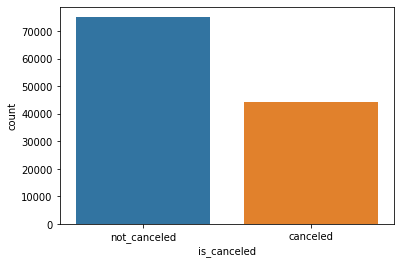

In [55]:
df_clean['is_canceled'] = df_clean.is_canceled.replace([1,0], ['canceled', 'not_canceled'])
canceled_data = df_clean['is_canceled']
sns.countplot(canceled_data)

It shows that majority of bookings were canceled

# **Lets look into cancellation rate among different type of hotel**


Text(0.5, 1.0, 'Graph showing cancellation rates in city and resort hotel')

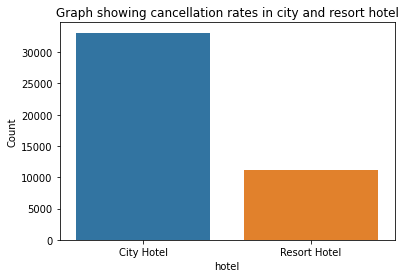

In [56]:
data = ['is_canceled', 'hotel']
type_of_hotel_canceled = df_clean[data]
canceled_hotel = type_of_hotel_canceled[type_of_hotel_canceled['is_canceled'] == 'canceled'].groupby(['hotel']).size().reset_index(name = 'Count')
sns.barplot(data = canceled_hotel, x = 'hotel', y = 'Count').set_title('Graph showing cancellation rates in city and resort hotel')

We conclude here that the majority of cancellation is for City Hotels

# **Booking ratio for each year**


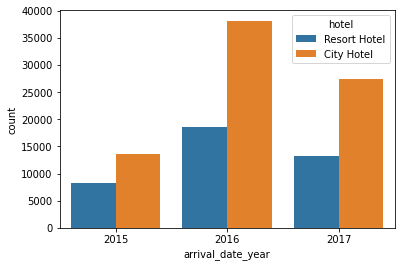

In [57]:
data = ['hotel', 'arrival_date_year', 'arrival_date_month','arrival_date_day_of_month' ]
period_arrival = df_clean[data]
sns.countplot(data = period_arrival, x = 'arrival_date_year', hue = 'hotel')

We can conclude a lot of information about yearly bookings for city & resort hotels

# **Overview of arrival monthwise for city and resort hotels**


Text(0, 0.5, 'Count')

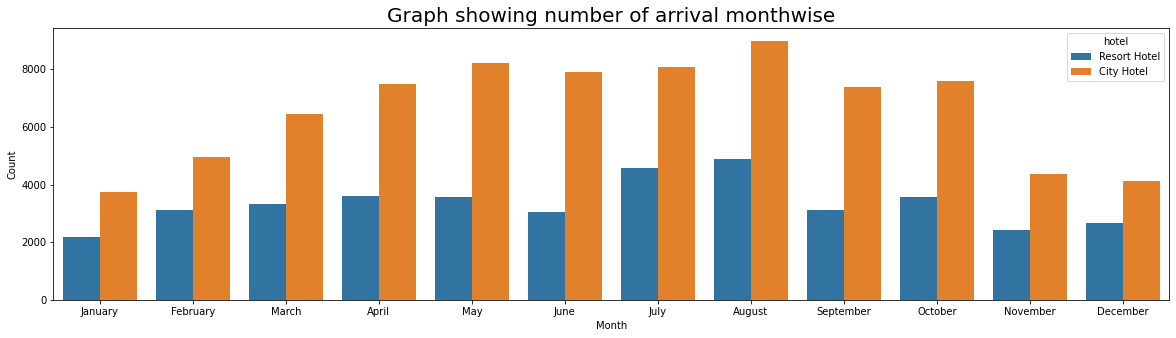

In [58]:
plt.figure(figsize=(20,5))

sns.countplot(data = period_arrival, x = 'arrival_date_month', hue = 'hotel', order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
          'August', 'September', 'October', 'November', 'December']).set_title('Graph showing number of arrival monthwise',fontsize=20)
plt.xlabel('Month')
plt.ylabel('Count')

We can see the monthly booking ratio for city and resort hotels 

# **Lets check the stay difference over weekend nights and week nights**

Text(0.5, 1.0, 'Number of stays on weekend nights')

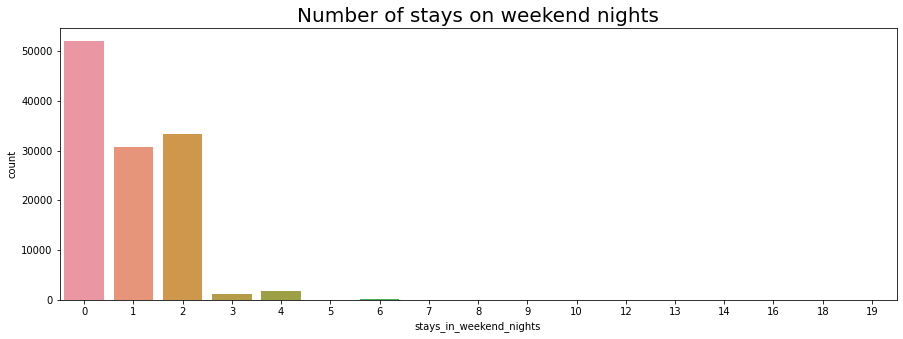

In [59]:

plt.figure(figsize=(15,5))

#stays_in_weekend_nights             
sns.countplot(data = df_clean, x = 'stays_in_weekend_nights').set_title('Number of stays on weekend nights', fontsize = 20)


Text(0.5, 1.0, 'Number of stays on weekend nights')

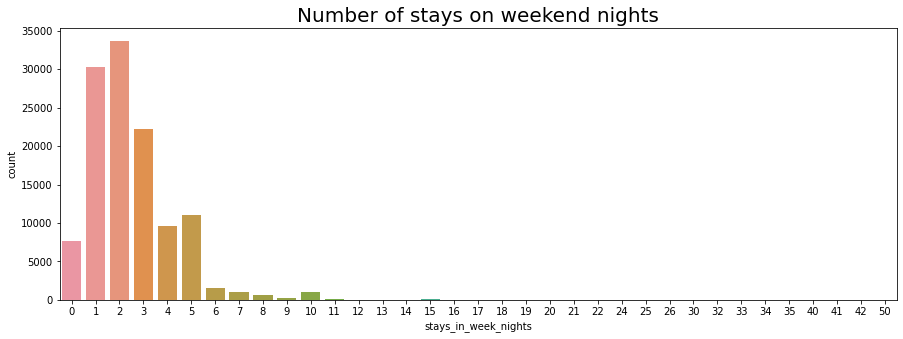

In [60]:
plt.figure(figsize=(15,5))

#stays_in_week_nights 
sns.countplot(data = df_clean, x = 'stays_in_week_nights').set_title('Number of stays on weekend nights', fontsize = 20)

Here we conclude that stays for week nights is higher over stays weekend nights

# **Looking into market segments and distribution channel**


Text(0.5, 1.0, 'Types of market segment')

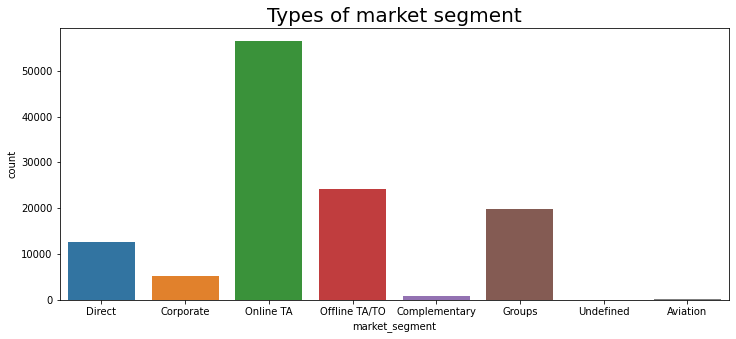

In [61]:
plt.figure(figsize=(12,5))
sns.countplot(data = df_clean, x = 'market_segment').set_title('Types of market segment', fontsize = 20)

Text(0.5, 1.0, 'Types of distribution channel')

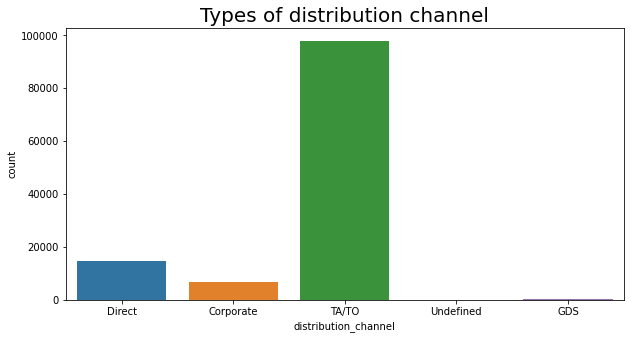

In [62]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_clean, x = 'distribution_channel').set_title('Types of distribution channel', fontsize = 20)

Majority of the distribution channels and market segments involve travel agencies (online or offline).
We can target our marketing area to be on these travel agencies website and work with them since majority of the visitors tend to reach out to them.

# **Lets find out the deposit type variation**

Text(0.5, 1.0, 'Graph showing types of deposits')

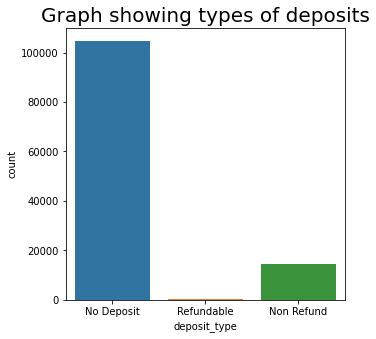

In [63]:
plt.figure(figsize=(5,5))
sns.countplot(data = df_clean, x = 'deposit_type').set_title('Graph showing types of deposits', fontsize = 20)


Majority of the booking does not require deposit. That could explain why cancellation rate is so high as compare to non-cancellation rate.


# **Overview of repeated guests for city and resort both**

Text(0.5, 1.0, 'Graph showing whether guest is repeated guest')

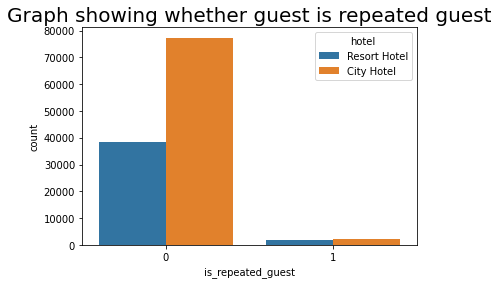

In [64]:
sns.countplot(data = df_clean, x = 'is_repeated_guest',hue = 'hotel').set_title('Graph showing whether guest is repeated guest', fontsize = 20)


Low number of repeated guests.
Need to focus on repeated guests since they have booked before.

# **ADR (average daily rate) overview**

In [65]:
# Installing required packages
!pip install sorted_months_weekdays
!pip install sort_dataframeby_monthorweek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [66]:
# Lets import installed packages
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *

In [67]:
city_adr = df_city.groupby("arrival_date_month")["adr"].mean().reset_index()
resort_adr = df_resort.groupby("arrival_date_month")["adr"].mean().reset_index()

city_adr.columns = ['month','avg_adr_city']
resort_adr.columns = ['month', 'avg_adr_resort']

data_adr = city_adr.merge(resort_adr,on='month')

data_adr = Sort_Dataframeby_Month(df=data_adr,monthcolumnname='month')
data_adr.round(2)

,month,avg_adr_city,avg_adr_resort
0,January,82.63,49.46
1,February,85.09,55.17
2,March,92.64,57.52
3,April,111.25,77.85
4,May,121.64,78.76
5,June,119.07,110.44
6,July,110.73,155.18
7,August,114.68,186.79
8,September,110.00,93.25
9,October,99.97,62.10


In [68]:
fig = px.line(data_adr, x='month', y=['avg_adr_city','avg_adr_resort'] ,
        title='Average daily rate per room per night',
        labels={
                     "value": "Avg. ADR [EUR]",
                     "month": "Month",
                     "variable": "Hotel Type"},  template = 'plotly_white'
       )

fig.show()

ADR fluctuates for resort hotels while ADR for city hotel is quite straight

# **Lets take an overview for most preferred meal**

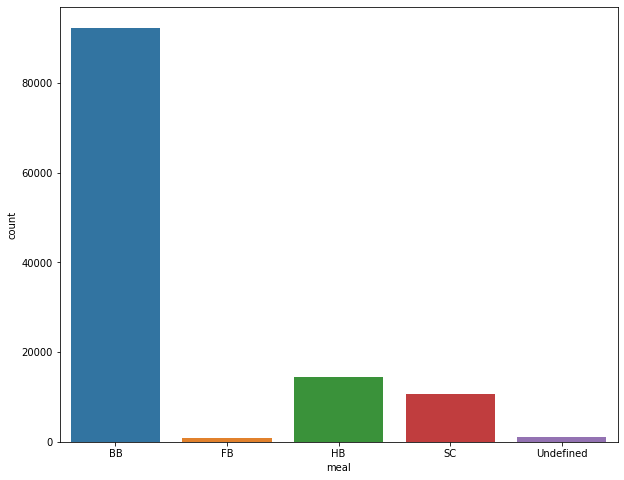

In [79]:
plt.figure( figsize=(10, 8))

sns.countplot(x = df_clean['meal'])
plt.show()

Most preferred type of meal is BB

# **Reason of cancellation**

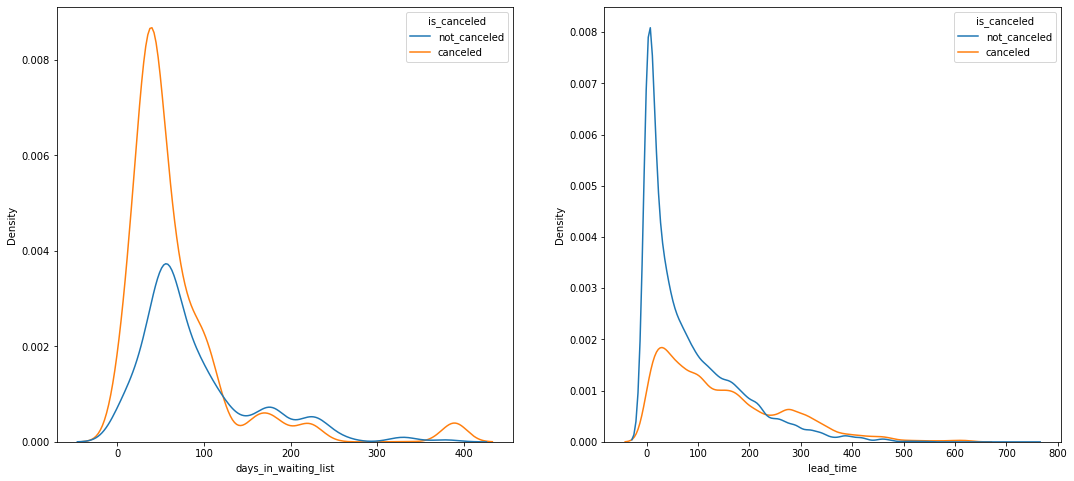

In [90]:
waiting_bookings = df_clean[df_clean['days_in_waiting_list'] !=0] 
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.kdeplot(ax=axes[0],x = 'days_in_waiting_list', hue = 'is_canceled' , data = waiting_bookings)
sns.kdeplot(ax = axes[1], x = df_clean['lead_time'], hue = df_clean['is_canceled'])
plt.show()


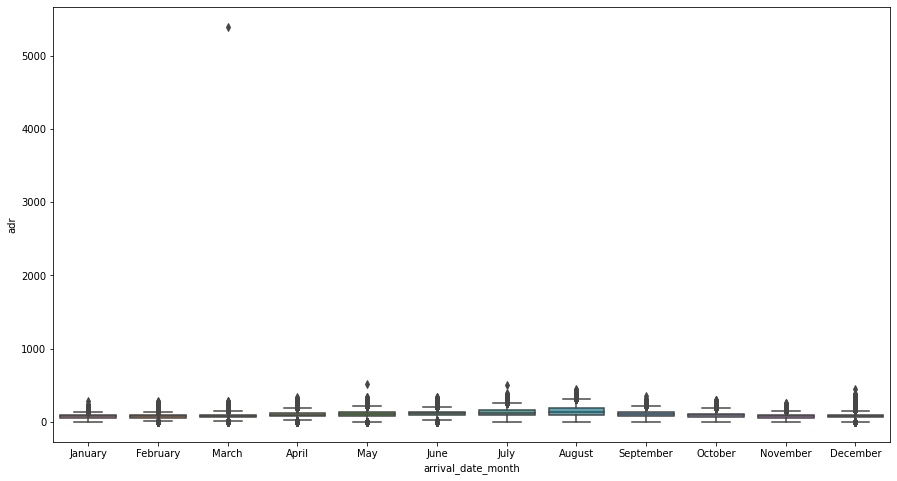

In [101]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df_clean['arrival_date_month'] = pd.Categorical(df_clean['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = df_clean['arrival_date_month'],y = df_clean['adr'])
plt.show()

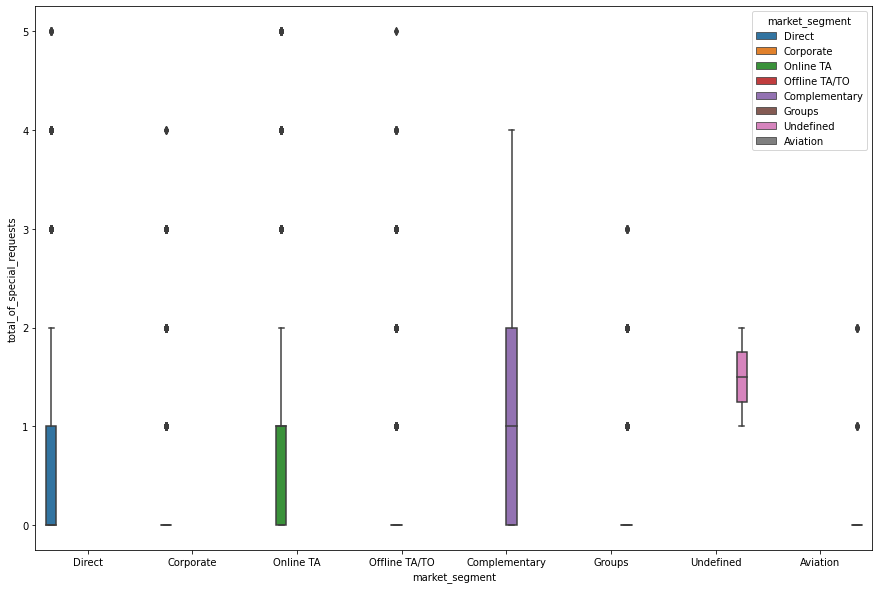

In [103]:
sns.boxplot(x="market_segment", y="total_of_special_requests",hue='market_segment',data= df_clean)

fig = plt.gcf()
fig.set_size_inches(15,10)

# **People stay**


In [116]:
df_clean['total_nights'] = df_clean['stays_in_weekend_nights'] + df_clean['stays_in_week_nights']

In [117]:
stay = df_clean.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})


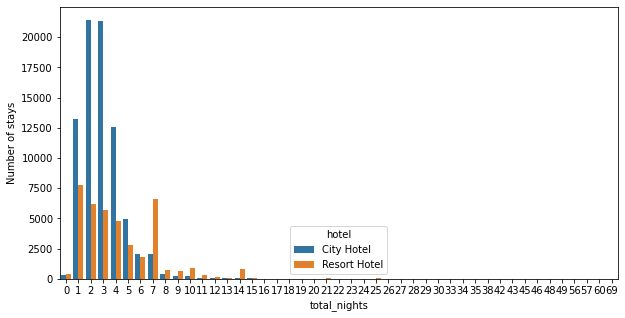

In [118]:
plt.figure(figsize = (10,5))
sns.barplot(x = 'total_nights', y = 'Number of stays',data= stay,hue='hotel')

People preferres to stay for max 5 days ina hotel